# Importing Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, tree, linear_model, ensemble, model_selection, neighbors, preprocessing, decomposition, metrics, base
import tensorflow as tf

# Loading, Analyzing and Visualizing the Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/music_genre.csv")
print(df.shape)

(50005, 18)


In [5]:
df.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.948,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933,4-Apr,0.203,Electronic


In [ ]:
df.tail()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.0,C#,0.119,-7.022,Major,0.2980,98.028,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.0,B,0.109,-9.814,Major,0.0550,122.043,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.0,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.0,G,0.106,-5.016,Minor,0.0441,75.886,4-Apr,0.354,Hip-Hop
50004,63470.0,Naughty By Nature,Hip Hop Hooray,67.0,0.10200,0.862,267267.0,0.642,0.0,F#,0.272,-13.652,Minor,0.1010,99.201,4-Apr,0.765,Hip-Hop


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
print(df["obtained_date"].value_counts())

obtained_date
4-Apr    44748
3-Apr     4067
5-Apr      784
1-Apr      400
0/4          1
Name: count, dtype: int64


In [ ]:
# for i in range(len(df["obtained_date"])):
#     if df["obtained_date"][i] == "0/4":
#         df["obtained_date"][i] = None

In [ ]:
print(df["obtained_date"].value_counts())

obtained_date
4-Apr    44748
3-Apr     4067
5-Apr      784
1-Apr      400
0/4          1
Name: count, dtype: int64


In [ ]:
# datetime = pd.to_datetime(df["obtained_date"], format = "%d-%b")
# df["day"] = datetime.dt.day

In [ ]:
# Dropping irrelevant attributes

df.drop(["instance_id", "artist_name", "track_name", "key", "obtained_date"], axis = 1, inplace = True)

In [ ]:
# Summary of the dataset

df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [ ]:
target = "music_genre"
num_classes = df[target].nunique()

# Preprocessing

In [ ]:
# Coverting the attribute with incorrect datatype ( "tempo" )

df["tempo"] = df["tempo"].apply(lambda arg : np.NaN if arg == "?" else arg).astype(np.float64)

In [ ]:
# Checking for null values in each column

df.isna().sum()

popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
valence                5
music_genre            5
dtype: int64

In [ ]:
# Handling null data

## Filling the missing data with median of the attribute for the respective class ( "tempo" )

tempo_by_class = df.groupby(target)["tempo"].median()

for class_ in df[target].unique():
    try:
        df["tempo"].fillna(tempo_by_class[class_], inplace = True)
    except:
        print(f"Missing data is handled ! Key '{class_}' not found !")

## Dropping the null values in the attributes ( others )

df.dropna(inplace = True)

Missing data is handled ! Key 'nan' not found !


In [ ]:
# Checking for null values in each column after handling them

df.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [ ]:
# Checking for duplicated data

print(df.duplicated().sum())

1


In [ ]:
# Handling duplicated data ( dropping duplicate rows )

df.drop_duplicates(inplace = True)

In [ ]:
# Checking for duplicated data after dropping

print(df.duplicated().sum())

0


In [ ]:
# Separating numerical and categorical columns

numerical_cols = df.select_dtypes([int, float]).columns.values
categorical_cols = df.select_dtypes(object).columns.values

print(f"Numerical Attributes: {numerical_cols}")
print(f"Categorical Attributes: {categorical_cols}")

Numerical Attributes: ['popularity' 'acousticness' 'danceability' 'duration_ms' 'energy'
 'instrumentalness' 'liveness' 'loudness' 'speechiness' 'tempo' 'valence']
Categorical Attributes: ['mode' 'music_genre']


mode
Major    32098
Minor    17901
Name: count, dtype: int64 




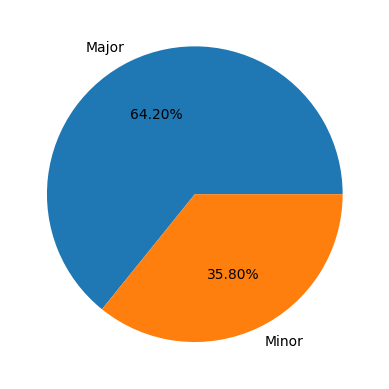

music_genre
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Electronic     4999
Name: count, dtype: int64 




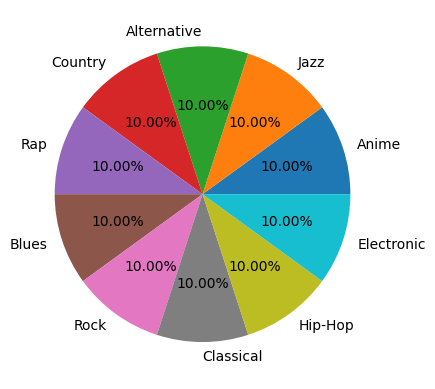

In [ ]:
# Count of each unique category in categorical attributes

for col in categorical_cols:
    val_counts = df[col].value_counts()
    print(val_counts, "\n\n")
    if (len(val_counts.index) > 10):
        continue
    plt.pie(val_counts, autopct = "%.2f%%", labels = val_counts.index)
    plt.show()

In [ ]:
# Encoding the categorical attributes ( Ordinal Encoding )

encoder = preprocessing.OrdinalEncoder()

encoded_arr = encoder.fit_transform(df.loc[:, ["mode", "music_genre"]]).astype(int).T

for i, col in enumerate(categorical_cols):
    df[col] = encoded_arr[i]

df.loc[:, categorical_cols]

,mode,music_genre
0,1,5
1,1,5
2,0,5
3,0,5
4,0,5
...,...,...
50000,0,6
50001,0,6
50002,0,6
50003,1,6


In [ ]:
# Separating features and labels

X = df.drop(target, axis = 1).values
y = df[target].values

print(X.shape, y.shape)

(49999, 12) (49999,)


In [ ]:
# Selecting a subset from the entire dataset ( Stratified random sampling )

X_, X, y_, y = model_selection.train_test_split(X, y, random_state = 36, stratify = y, test_size = 0.05)

print(X.shape, y.shape)

(2500, 12) (2500,)


In [ ]:
# Splitting the data into training and testing data using stratified random sampling

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 36, stratify = y, test_size = 0.1)

print(X_train.shape, X_test.shape)

(2250, 12) (250, 12)


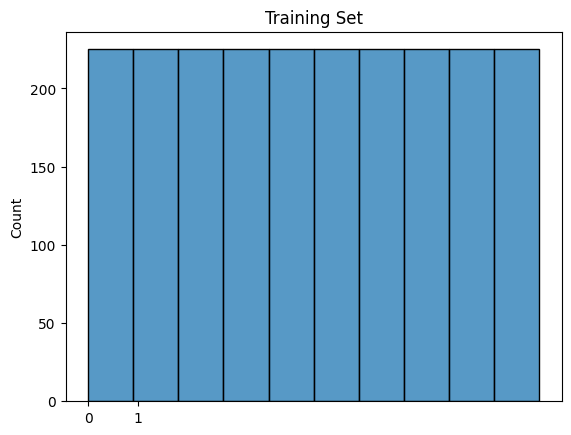

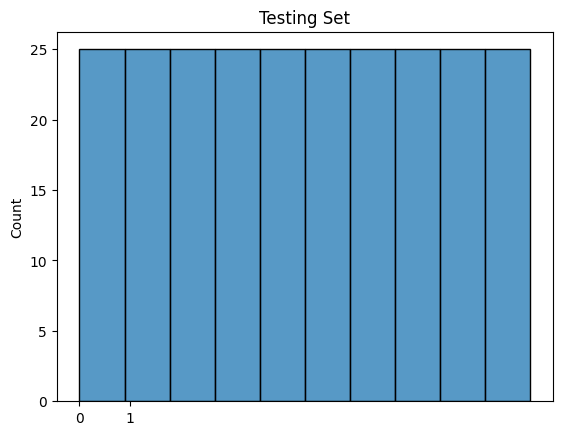

In [ ]:
plt.title("Training Set")
sns.histplot(y_train, bins = num_classes)
plt.xticks([0, 1])
plt.show()

plt.title("Testing Set")
sns.histplot(y_test, bins = num_classes)
plt.xticks([0, 1])
plt.show()

In [ ]:
# Scaling continuous features ( MinMax Scaling )

scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

print(X_train[:, 0].min(), X_train[:, 0].max())
print(X_test[:, 0].min(), X_test[:, 0].max())

0.0 1.0
0.0 1.0


## Feature Selection

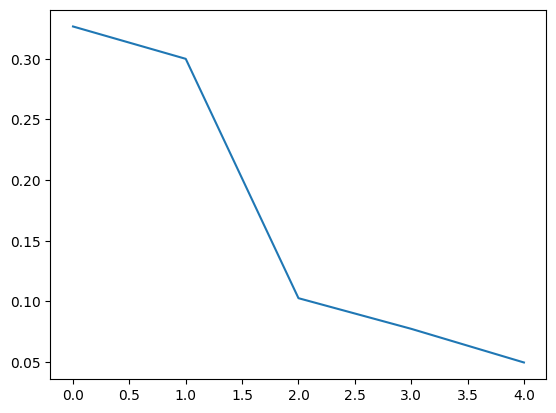

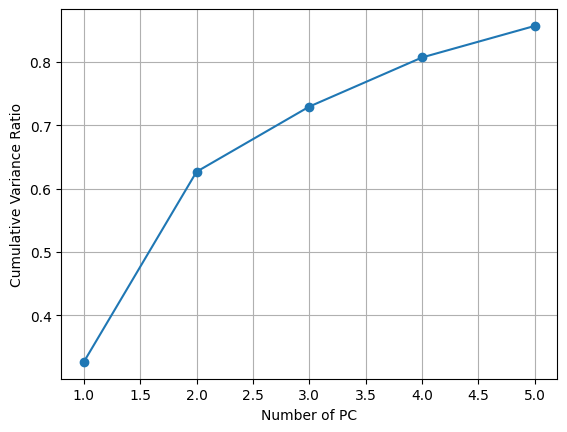

In [ ]:
# PCA through scikit-learn

pca = decomposition.PCA(n_components = 5)
pca.fit(X_train)

X_train_pc = pca.transform(X_train)

exp_var_ratio = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var_ratio)

plt.plot(exp_var_ratio)
plt.show()

plt.plot(np.arange(1, len(cum_sum) + 1), cum_sum, marker = "o")
plt.xlabel("Number of PC")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()

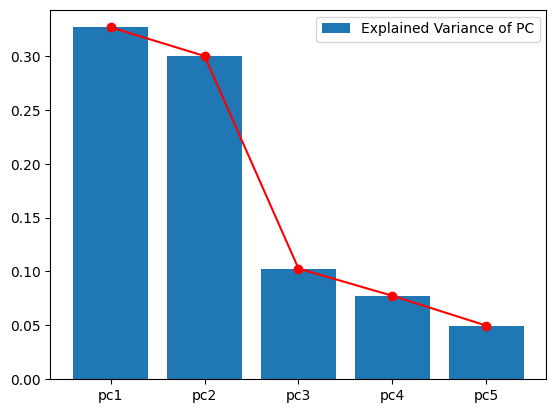

In [ ]:
n_features = 5

plt.bar(np.arange(n_features), exp_var_ratio, label = "Explained Variance of PC")
plt.plot(exp_var_ratio, color = "red", marker = "o")
plt.xticks(ticks = np.arange(n_features), labels = ["pc" + str(i) for i in np.arange(1, n_features + 1)])
plt.legend()
plt.show()

In [ ]:
X_test_pc = pca.transform(X_test)

print(X_train_pc.shape, X_test_pc.shape)

(2250, 5) (250, 5)


In [ ]:
X_train = X_train_pc.copy()
X_test = X_test_pc.copy()

# Model Building and Training

## Support Vector Machine

#### Model Training

In [ ]:
# Training SVM Classifier

model = svm.SVC()

model.fit(X_train, y_train)

SVC()

In [ ]:
# Making predictions on train set

y_train_pred = model.predict(X_train)
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

Train Accuracy: 0.4533333333333333


#### Model Evaluation

In [ ]:
# Evaluating the model on test set

y_test_pred = model.predict(X_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.456


#### Cross Validation

In [ ]:
# Performing K-Fold cross validation

cross_val_scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv = 5)
print("Cross validation accuracy (avg):", cross_val_scores.sum() / len(cross_val_scores))

Cross validation accuracy (avg): 0.4173333333333333


#### Hyperparameter Tuning

In [ ]:
# Tuning hyperparameters using GridSearch

grid = model_selection.GridSearchCV(estimator = base.clone(model), param_grid = { "kernel" : ["linear", "rbf", "poly"], "C" : np.arange(1, 5), "gamma" : ["auto", "scale"], "degree" : np.arange(1, 5) }, cv = 5)
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4]),
                         'degree': array([1, 2, 3, 4]),
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4]),
                         'degree': array([1, 2, 3, 4]),
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'C': 4, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
print("Average cross validation accuracy:", grid.best_score_)

Average cross validation accuracy: 0.43555555555555553


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.190784,0.043661,0.044574,0.002649,1,1,auto,linear,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel...",0.413333,0.402222,0.377778,0.377778,0.415556,0.397333,0.016594,61
1,0.282573,0.014421,0.220088,0.010988,1,1,auto,rbf,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel...",0.406667,0.397778,0.366667,0.375556,0.400000,0.389333,0.015422,72
2,0.212675,0.037756,0.041579,0.005275,1,1,auto,poly,"{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel...",0.364444,0.377778,0.344444,0.346667,0.380000,0.362667,0.014967,84
3,0.180388,0.026739,0.042058,0.001155,1,1,scale,linear,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kerne...",0.413333,0.402222,0.377778,0.377778,0.415556,0.397333,0.016594,61
4,0.260129,0.012769,0.199410,0.006950,1,1,scale,rbf,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kerne...",0.413333,0.428889,0.375556,0.424444,0.444444,0.417333,0.023154,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.291698,0.050464,0.211576,0.020076,4,4,auto,rbf,"{'C': 4, 'degree': 4, 'gamma': 'auto', 'kernel...",0.413333,0.426667,0.371111,0.417778,0.437778,0.413333,0.022706,20
92,0.330718,0.022684,0.052083,0.009162,4,4,auto,poly,"{'C': 4, 'degree': 4, 'gamma': 'auto', 'kernel...",0.217778,0.220000,0.202222,0.222222,0.220000,0.216444,0.007249,93
93,0.199575,0.011735,0.042492,0.011719,4,4,scale,linear,"{'C': 4, 'degree': 4, 'gamma': 'scale', 'kerne...",0.402222,0.413333,0.384444,0.404444,0.420000,0.404889,0.012041,31
94,0.279159,0.027457,0.198407,0.012196,4,4,scale,rbf,"{'C': 4, 'degree': 4, 'gamma': 'scale', 'kerne...",0.422222,0.446667,0.404444,0.451111,0.453333,0.435556,0.019116,1


In [ ]:
best_model = grid.best_estimator_

#### Training and evaluating the best model obtained after tuning

In [ ]:
best_model.fit(X_train, y_train)

SVC(C=4, degree=1)

In [ ]:
# Making predictions on train set

y_train_pred = best_model.predict(X_train)
print("Train Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Evaluating the model on test set

y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.48577777777777775
Test Accuracy: 0.464


              precision    recall  f1-score   support

           0       0.30      0.28      0.29        25
           1       0.53      0.36      0.43        25
           2       0.48      0.44      0.46        25
           3       0.78      0.84      0.81        25
           4       0.35      0.68      0.46        25
           5       0.64      0.36      0.46        25
           6       0.54      0.28      0.37        25
           7       0.62      0.60      0.61        25
           8       0.33      0.52      0.40        25
           9       0.35      0.28      0.31        25

    accuracy                           0.46       250
   macro avg       0.49      0.46      0.46       250
weighted avg       0.49      0.46      0.46       250



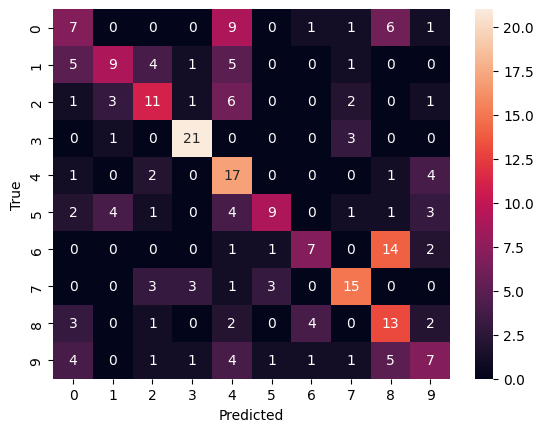

In [ ]:
# Evaluation metrics

clf_report = metrics.classification_report(y_test, y_test_pred)
print(clf_report)

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression

#### Model Training

In [ ]:
# Training Logistic Regression Model

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Making predictions on train set

y_train_pred = model.predict(X_train)
print("Train Accuracy:", model.score(X_train, y_train))

Train Accuracy: 0.4111111111111111


#### Model Evaluation

In [ ]:
# Evaluating the model on test set

y_test_pred = model.predict(X_test)
print("Test Accuracy:", model.score(X_test, y_test))

### Observation: Strongly Overfitting

Test Accuracy: 0.432


#### Cross Validation

In [ ]:
# Performing K-Fold cross validation

cross_val_scores = model_selection.cross_val_score(base.clone(model), X_train, y_train, cv = 5)
print("Cross validation accuracy (avg):", cross_val_scores.sum() / len(cross_val_scores))

Cross validation accuracy (avg): 0.40355555555555556


              precision    recall  f1-score   support

           0       0.27      0.24      0.26        25
           1       0.50      0.40      0.44        25
           2       0.60      0.36      0.45        25
           3       0.79      0.92      0.85        25
           4       0.24      0.48      0.32        25
           5       0.65      0.44      0.52        25
           6       0.41      0.44      0.42        25
           7       0.62      0.60      0.61        25
           8       0.33      0.40      0.36        25
           9       0.06      0.04      0.05        25

    accuracy                           0.43       250
   macro avg       0.45      0.43      0.43       250
weighted avg       0.45      0.43      0.43       250



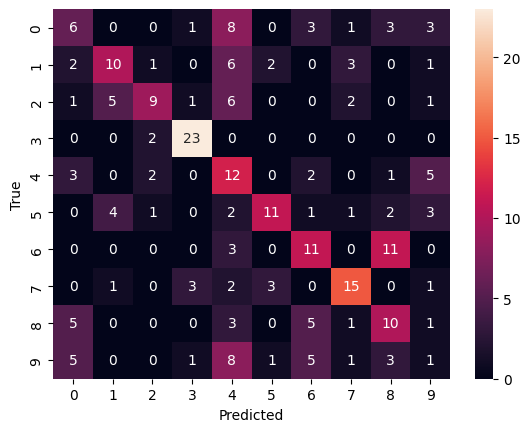

In [ ]:
# Evaluation metrics

clf_report = metrics.classification_report(y_test, y_test_pred)
print(clf_report)

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

----

## Artificial Neural Network

In [ ]:
def prepare_data(df, target, test_split = 0.02, val_split = 0.05):
    X = df.drop(target, axis = 1).values
    y = df[target].values
    X_train_val, X_test, y_train_val, y_test = model_selection.train_test_split(X, y, random_state = 7, stratify = y, test_size = test_split)
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_val, y_train_val, random_state = 7, stratify = y_train_val, test_size = val_split)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.fit_transform(X_val)
    X_test = scaler.fit_transform(X_test)
    return ((X_train, y_train), (X_val, y_val), (X_test, y_test))

In [ ]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = prepare_data(df, target)

print(X_train.shape, X_val.shape, X_test.shape)

(46549, 12) (2450, 12) (1000, 12)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    tf.keras.layers.Dense(units = 2000, kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation = "elu"),
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    tf.keras.layers.Dense(units = 1000, kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation = "elu"),
    tf.keras.layers.Dense(units = 500, kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation = "elu"),
    tf.keras.layers.Dense(units = 100, kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation = "elu"),
    tf.keras.layers.Dense(units = 50, kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation = "elu"),
    tf.keras.layers.Dense(units = num_classes, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 2000)              26000     
                                                                 
 batch_normalization_34 (Ba  (None, 2000)              8000      
 tchNormalization)                                               
                                                                 
 activation_33 (Activation)  (None, 2000)              0         
                                                                 
 input_17 (InputLayer)       multiple                  0         
                                                                 
 dense_57 (Dense)            (None, 1000)              2001000   
                                                                 
 batch_normalization_35 (Ba  (None, 1000)              4000      
 tchNormalization)                                   

In [ ]:
# Training the neural network

cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val), callbacks = [cb])

Epoch 1/50
1455/1455 [==============================] - 88s 56ms/step - loss: 1.3357 - accuracy: 0.4945 - val_loss: 1.2898 - val_accuracy: 0.5167
Epoch 2/50
1455/1455 [==============================] - 74s 51ms/step - loss: 1.2588 - accuracy: 0.5176 - val_loss: 1.2983 - val_accuracy: 0.5118
Epoch 3/50
1455/1455 [==============================] - 76s 52ms/step - loss: 1.2382 - accuracy: 0.5259 - val_loss: 1.2899 - val_accuracy: 0.5127
Epoch 4/50
1455/1455 [==============================] - 80s 55ms/step - loss: 1.2229 - accuracy: 0.5289 - val_loss: 1.2855 - val_accuracy: 0.5131
Epoch 5/50
1455/1455 [==============================] - 77s 53ms/step - loss: 1.2000 - accuracy: 0.5353 - val_loss: 1.4744 - val_accuracy: 0.4641
Epoch 6/50
1455/1455 [==============================] - 75s 51ms/step - loss: 1.1890 - accuracy: 0.5394 - val_loss: 1.5703 - val_accuracy: 0.4478
Epoch 7/50
1455/1455 [==============================] - 76s 52ms/step - loss: 1.1849 - accuracy: 0.5418 - val_loss: 1.8656 -

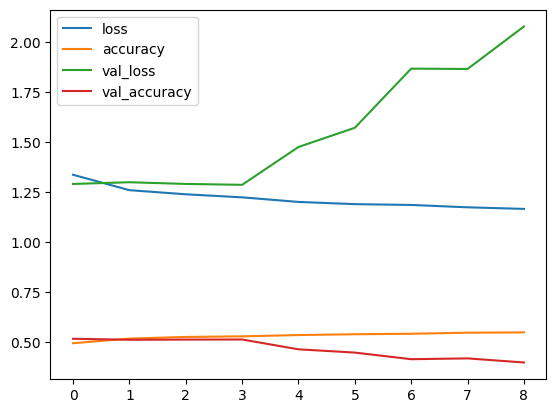

In [ ]:
result_df = pd.DataFrame(history.history)

result_df.plot()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 10ms/step - loss: 1.3735 - accuracy: 0.4920


[1.37350332736969, 0.492000013589859]

32/32 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0    0.35417   0.17000   0.22973       100
           1    0.77778   0.56000   0.65116       100
           2    0.72973   0.27000   0.39416       100
           3    0.73950   0.88000   0.80365       100
           4    0.52632   0.20000   0.28986       100
           5    0.51163   0.66000   0.57642       100
           6    0.41489   0.39000   0.40206       100
           7    0.46341   0.38000   0.41758       100
           8    0.40496   0.49000   0.44344       100
           9    0.35385   0.92000   0.51111       100

    accuracy                        0.49200      1000
   macro avg    0.52762   0.49200   0.47192      1000
weighted avg    0.52762   0.49200   0.47192      1000



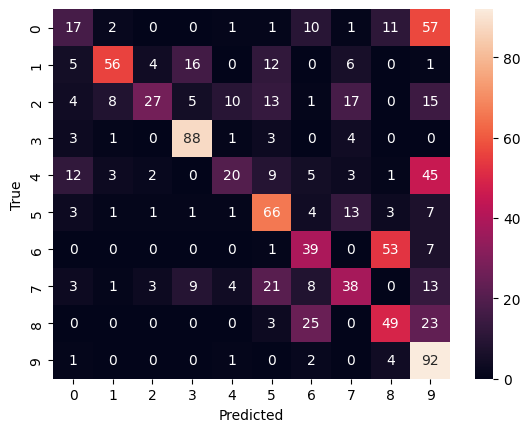

In [ ]:
# Evaluation metrics

y_test_pred = np.array([np.argmax(x) for x in model.predict(X_test)])

clf_report = metrics.classification_report(y_test, y_test_pred, digits = 5)
print(clf_report)

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Conclusion